In [3]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils import data
torch.set_default_tensor_type(torch.cuda.FloatTensor)

root_dir = "./data/train";
train_set = datasets.ImageFolder(root = root_dir,
                transform = transforms.ToTensor())

trainloader = data.DataLoader(train_set, batch_size = 1, shuffle = True)

root_dir = "./data/test";
train_set = datasets.ImageFolder(root = root_dir,
                transform = transforms.ToTensor())

testloader = data.DataLoader(train_set, batch_size = 1, shuffle = True)

classes = torch.tensor(range(0,28))
print(classes[27])

print("train size: " + str(len(trainloader)))

print("test size: " + str(len(testloader)))

tensor(27)
train size: 11200
test size: 2772


torch.Size([1, 3, 250, 250])
tensor(1)


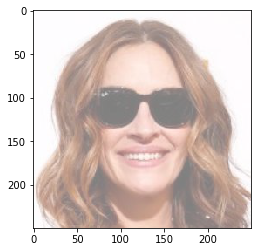

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, device):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 12, stride=2)            #250x250x3 to 76x76x6
        self.pool = nn.MaxPool2d(2, 2)              #116x116x6 to 58x58x6
        self.conv2 = nn.Conv2d(6, 16, 9)           #19x19x6 to 10x10x16
        self.conv3 = nn.Conv2d(16, 30, 7)
        self.fc1 = nn.Linear(30 * 10 * 10, 240)       #coś tu się dzieje, nie jestem pewnien co
        self.fc2 = nn.Linear(240, 120)
        self.fc3 = nn.Linear(120, 28)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        # print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = self.pool(F.relu(self.conv3(x)))
        # print("to tu?")
        x = x.view(-1, 30 * 10 * 10)
        # print(x.shape)
        x = F.relu(self.fc1(x))
        # print(x.shape)
        x = F.relu(self.fc2(x))
        # print(x.shape)
        x = self.fc3(x)
        # print(x.shape)
        return x


net = Net(device='cuda:0')
# print(net.parameters())

In [13]:
import torch.optim as optim


# criterion = nn.L1Loss()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [29]:
# counter=0
# for epoch in range(2):  # loop over the dataset multiple times
#
#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data
#         # print(inputs.shape)
#
#         # zero the parameter gradients
#         optimizer.zero_grad()
#
#         # forward + backward + optimize
#         outputs = net(inputs)
#         # print(outputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#
#         # print statistics
#         running_loss += loss.item()
#         if i % 20 == 19:    # print every 2000 mini-batches
#             counter += 1
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 20))
#             running_loss = 0.0
#             if(counter > 5):
#                 cos

# print('Finished Training')

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [15]:
torch.set_default_tensor_type(torch.cuda.FloatTensor)
def accuracy():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print('Accuracy of the network on the 10000 test images: %f %%' % (
        100 * correct / total))


In [ ]:
counter=0
for epoch in range(10):  # loop over the dataset multiple times


    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)
        # print(inputs.shape)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # print(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 2000 mini-batches
            counter += 1
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
    accuracy()

print('Finished Training')

[1,  1000] loss: 3.335
[1,  2000] loss: 3.335
[1,  3000] loss: 3.336
[1,  4000] loss: 3.337
[1,  5000] loss: 3.331
[1,  6000] loss: 3.317
[1,  7000] loss: 3.219
[1,  8000] loss: 3.104
[1,  9000] loss: 3.041
[1, 10000] loss: 2.939
[1, 11000] loss: 2.912
Accuracy of the network on the 10000 test images: 11.688312 %
[2,  1000] loss: 2.833
[2,  2000] loss: 2.791
[2,  3000] loss: 2.718
[2,  4000] loss: 2.641
[2,  5000] loss: 2.703
[2,  6000] loss: 2.580
[2,  7000] loss: 2.596
[2,  8000] loss: 2.595
[2,  9000] loss: 2.534
[2, 10000] loss: 2.512
[2, 11000] loss: 2.519
Accuracy of the network on the 10000 test images: 28.066378 %
[3,  1000] loss: 2.409
[3,  2000] loss: 2.402
[3,  3000] loss: 2.516
[3,  4000] loss: 2.432
[3,  5000] loss: 2.539
[3,  6000] loss: 2.578
[3,  7000] loss: 2.410
[3,  8000] loss: 2.447
[3,  9000] loss: 2.419
[3, 10000] loss: 2.469
[3, 11000] loss: 2.445
Accuracy of the network on the 10000 test images: 30.303030 %
[4,  1000] loss: 2.329
[4,  2000] loss: 2.462
[4,  3000

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
class Net(nn.Module):
    def __init__(self, device):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 12, stride=2)  #250x250x3 to 76x76x6
        self.pool = nn.MaxPool2d(3, 3)              #116x116x6 to 58x58x6
        self.conv2 = nn.Conv2d(6, 16, 11)           #19x19x6 to 10x10x16
        self.fc1 = nn.Linear(16 * 10 * 10, 240)       #coś tu się dzieje, nie jestem pewnien co
        self.fc2 = nn.Linear(240, 120)
        self.fc3 = nn.Linear(120, 28)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        # print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        # print("to tu?")
        x = x.view(-1, 16 * 10 * 10)
        # print(x.shape)
        x = F.relu(self.fc1(x))
        # print(x.shape)
        x = F.relu(self.fc2(x))
        # print(x.shape)
        x = self.fc3(x)
        # print(x.shape)
        return x
batch size = 100
[1,   100] loss: 3.334
Accuracy of the network on the 10000 test images: 3.535354 %
[2,   100] loss: 3.333
Accuracy of the network on the 10000 test images: 3.823954 %
[3,   100] loss: 3.332
Accuracy of the network on the 10000 test images: 3.499278 %
[4,   100] loss: 3.330
Accuracy of the network on the 10000 test images: 3.571429 %
[5,   100] loss: 3.325
Accuracy of the network on the 10000 test images: 5.050505 %

batch size = 10
[1,  1000] loss: 3.333
Accuracy of the network on the 10000 test images: 4.112554 %
[2,  1000] loss: 3.281
Accuracy of the network on the 10000 test images: 12.265512 %
[3,  1000] loss: 2.756
Accuracy of the network on the 10000 test images: 26.118326 %
[4,  1000] loss: 2.400
Accuracy of the network on the 10000 test images: 37.409812 %
[5,  1000] loss: 2.061
Accuracy of the network on the 10000 test images: 40.367965 %
[6,  1000] loss: 1.793
Accuracy of the network on the 10000 test images: 44.877345 %
[7,  1000] loss: 1.549
Accuracy of the network on the 10000 test images: 50.288600 %
[8,  1000] loss: 1.352
Accuracy of the network on the 10000 test images: 56.204906 %
[9,  1000] loss: 1.161
Accuracy of the network on the 10000 test images: 55.483405 %
[10,  1000] loss: 0.999
Accuracy of the network on the 10000 test images: 56.060606 %
[11,  1000] loss: 0.860
Accuracy of the network on the 10000 test images: 61.183261 %
[12,  1000] loss: 0.730
Accuracy of the network on the 10000 test images: 61.147186 %
[13,  1000] loss: 0.640
Accuracy of the network on the 10000 test images: 62.481962 %
[14,  1000] loss: 0.504
Accuracy of the network on the 10000 test images: 60.101010 %
[15,  1000] loss: 0.432
Accuracy of the network on the 10000 test images: 64.862915 %
Finished Training

batch size = 4

[1,  1000] loss: 3.327
[1,  2000] loss: 3.193
Accuracy of the network on the 10000 test images: 18.073593 %
[2,  1000] loss: 2.697
[2,  2000] loss: 2.506
Accuracy of the network on the 10000 test images: 33.621934 %
[3,  1000] loss: 2.174
[3,  2000] loss: 2.026
Accuracy of the network on the 10000 test images: 43.650794 %
[4,  1000] loss: 1.667
[4,  2000] loss: 1.638
Accuracy of the network on the 10000 test images: 47.763348 %
[5,  1000] loss: 1.330
[5,  2000] loss: 1.350
Accuracy of the network on the 10000 test images: 58.405483 %
[6,  1000] loss: 1.094
[6,  2000] loss: 1.152
Accuracy of the network on the 10000 test images: 58.694084 %
[7,  1000] loss: 0.909
[7,  2000] loss: 0.955
Accuracy of the network on the 10000 test images: 59.595960 %
[8,  1000] loss: 0.771
[8,  2000] loss: 0.878
Accuracy of the network on the 10000 test images: 59.920635 %
[9,  1000] loss: 0.643
[9,  2000] loss: 0.773
Accuracy of the network on the 10000 test images: 62.662338 %
[10,  1000] loss: 0.577
[10,  2000] loss: 0.649
Accuracy of the network on the 10000 test images: 62.337662 %
[11,  1000] loss: 0.477
[11,  2000] loss: 0.633
Accuracy of the network on the 10000 test images: 59.307359 %
[12,  1000] loss: 0.503
[12,  2000] loss: 0.576
Accuracy of the network on the 10000 test images: 62.626263 %
[13,  1000] loss: 0.428
[13,  2000] loss: 0.512
Accuracy of the network on the 10000 test images: 60.137085 %
[14,  1000] loss: 0.387
[14,  2000] loss: 0.487
Accuracy of the network on the 10000 test images: 60.028860 %
[15,  1000] loss: 0.311
[15,  2000] loss: 0.527
Accuracy of the network on the 10000 test images: 62.698413 %
Finished Training


class Net(nn.Module):
    def __init__(self, device):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 12, stride=2)            #250x250x3 to 76x76x6
        self.pool = nn.MaxPool2d(2, 2)              #116x116x6 to 58x58x6
        self.conv2 = nn.Conv2d(6, 16, 9)           #19x19x6 to 10x10x16
        self.conv3 = nn.Conv2d(16, 30, 7)
        self.fc1 = nn.Linear(30 * 10 * 10, 240)       #coś tu się dzieje, nie jestem pewnien co
        # self.fc2 = nn.Linear(240, 120)
        self.fc3 = nn.Linear(240, 28)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        # print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = self.pool(F.relu(self.conv3(x)))
        # print("to tu?")
        x = x.view(-1, 30 * 10 * 10)
        # print(x.shape)
        x = F.relu(self.fc1(x))
        # print(x.shape)
        # x = F.relu(self.fc2(x))
        # print(x.shape)
        x = self.fc3(x)
        # print(x.shape)
        return x

[1,  1000] loss: 3.336
[1,  2000] loss: 3.337
[1,  3000] loss: 3.334
[1,  4000] loss: 3.330
[1,  5000] loss: 3.303
[1,  6000] loss: 3.315
[1,  7000] loss: 3.314
[1,  8000] loss: 3.185
[1,  9000] loss: 3.217
[1, 10000] loss: 2.942
[1, 11000] loss: 2.713
Accuracy of the network on the 10000 test images: 25.072150 %
[2,  1000] loss: 2.623
[2,  2000] loss: 2.660
[2,  3000] loss: 2.555
[2,  4000] loss: 2.615
[2,  5000] loss: 2.548
[2,  6000] loss: 2.547
[2,  7000] loss: 2.610
[2,  8000] loss: 2.531
[2,  9000] loss: 2.433
[2, 10000] loss: 2.333
[2, 11000] loss: 2.296
Accuracy of the network on the 10000 test images: 36.580087 %
[3,  1000] loss: 2.178
[3,  2000] loss: 2.379
[3,  3000] loss: 2.279
[3,  4000] loss: 2.166
[3,  5000] loss: 2.028
[3,  6000] loss: 2.271
[3,  7000] loss: 2.305
[3,  8000] loss: 3.126
[3,  9000] loss: 3.344
[3, 10000] loss: 3.342
[3, 11000] loss: 3.337
Accuracy of the network on the 10000 test images: 3.607504 %
[4,  1000] loss: 3.340
[4,  2000] loss: 3.338
[4,  3000] loss: 3.339
[4,  4000] loss: 3.344
[4,  5000] loss: 3.335
[4,  6000] loss: 3.340
[4,  7000] loss: 3.337
[4,  8000] loss: 3.341
[4,  9000] loss: 3.335
[4, 10000] loss: 3.339
[4, 11000] loss: 3.340
Accuracy of the network on the 10000 test images: 3.607504 %
[5,  1000] loss: 3.331
[5,  2000] loss: 3.343
[5,  3000] loss: 3.337
[5,  4000] loss: 3.335
[5,  5000] loss: 3.336
[5,  6000] loss: 3.335
[5,  7000] loss: 3.340
[5,  8000] loss: 3.331
[5,  9000] loss: 3.337
[5, 10000] loss: 3.338
[5, 11000] loss: 3.336
Accuracy of the network on the 10000 test images: 3.679654 %
[6,  1000] loss: 3.332
[6,  2000] loss: 3.340
[6,  3000] loss: 3.274
[6,  4000] loss: 2.022
[6,  5000] loss: 2.080
[6,  6000] loss: 2.033
[6,  7000] loss: 2.150
[6,  8000] loss: 2.259
[6,  9000] loss: 2.233
[6, 10000] loss: 2.963
[6, 11000] loss: 2.583
Accuracy of the network on the 10000 test images: 41.269841 %
[7,  1000] loss: 2.859
[7,  2000] loss: 3.343
[7,  3000] loss: 2.875
[7,  4000] loss: 1.853
[7,  5000] loss: 2.106
[7,  6000] loss: 2.021
[7,  7000] loss: 2.225
[7,  8000] loss: 3.000
[7,  9000] loss: 3.334
[7, 10000] loss: 3.339
[7, 11000] loss: 3.328
Accuracy of the network on the 10000 test images: 10.137085 %
[8,  1000] loss: 2.423
[8,  2000] loss: 2.887
[8,  3000] loss: 3.100
[8,  4000] loss: 2.008
[8,  5000] loss: 2.061
[8,  6000] loss: 1.931
[8,  7000] loss: 2.061
[8,  8000] loss: 2.065
[8,  9000] loss: 1.974
[8, 10000] loss: 2.111
[8, 11000] loss: 1.982
Accuracy of the network on the 10000 test images: 34.199134 %
[9,  1000] loss: 2.538
[9,  2000] loss: 1.867
[9,  3000] loss: 1.859
[9,  4000] loss: 1.816
[9,  5000] loss: 1.877
[9,  6000] loss: 1.733
[9,  7000] loss: 1.923
[9,  8000] loss: 1.958
[9,  9000] loss: 1.906
[9, 10000] loss: 1.853
[9, 11000] loss: 2.515
Accuracy of the network on the 10000 test images: 28.499278 %
[10,  1000] loss: 1.698
[10,  2000] loss: 1.492
[10,  3000] loss: 2.214
[10,  4000] loss: 3.045
[10,  5000] loss: 3.179
[10,  6000] loss: 2.152
[10,  7000] loss: 1.925
[10,  8000] loss: 1.947
[10,  9000] loss: 1.805
[10, 10000] loss: 1.876
[10, 11000] loss: 1.867
Accuracy of the network on the 10000 test images: 36.940837 %
[11,  1000] loss: 1.616
[11,  2000] loss: 1.671
[11,  3000] loss: 1.727
[11,  4000] loss: 1.783
[11,  5000] loss: 1.755
[11,  6000] loss: 2.364
[11,  7000] loss: 2.555
[11,  8000] loss: 3.317
[11,  9000] loss: 2.634
[11, 10000] loss: 1.829
[11, 11000] loss: 1.829
Accuracy of the network on the 10000 test images: 36.399711 %
[12,  1000] loss: 1.512
[12,  2000] loss: 2.549
[12,  3000] loss: 1.670
[12,  4000] loss: 2.378
[12,  5000] loss: 2.809
[12,  6000] loss: 2.049
[12,  7000] loss: 2.655
[12,  8000] loss: 1.723
[12,  9000] loss: 1.929
[12, 10000] loss: 1.705
[12, 11000] loss: 1.865
Accuracy of the network on the 10000 test images: 29.545455 %
[13,  1000] loss: 1.964
[13,  2000] loss: 3.338
[13,  3000] loss: 2.484
[13,  4000] loss: 1.514
[13,  5000] loss: 2.148
[13,  6000] loss: 1.623
[13,  7000] loss: 2.708
[13,  8000] loss: 3.311
[13,  9000] loss: 3.309
[13, 10000] loss: 3.289
[13, 11000] loss: 2.268
Accuracy of the network on the 10000 test images: 7.467532 %
[14,  1000] loss: 2.197
[14,  2000] loss: 1.690
[14,  3000] loss: 2.909
[14,  4000] loss: 2.689
[14,  5000] loss: 1.998
[14,  6000] loss: 1.760
[14,  7000] loss: 2.363
[14,  8000] loss: 3.276
[14,  9000] loss: 3.216
[14, 10000] loss: 2.895
[14, 11000] loss: 3.158
Accuracy of the network on the 10000 test images: 19.408369 %
[15,  1000] loss: 1.613
[15,  2000] loss: 1.606
[15,  3000] loss: 2.213
[15,  4000] loss: 1.975
[15,  5000] loss: 1.896
[15,  6000] loss: 2.820
[15,  7000] loss: 1.782
[15,  8000] loss: 1.871
[15,  9000] loss: 1.789
[15, 10000] loss: 1.932
[15, 11000] loss: 3.170
Accuracy of the network on the 10000 test images: 6.746032 %
Finished Training

net = Net(device='cuda:0')
# print(net.parameters())

class Net(nn.Module):
    def __init__(self, device):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 12, stride=2)            #250x250x3 to 76x76x6
        self.pool = nn.MaxPool2d(2, 2)              #116x116x6 to 58x58x6
        self.conv2 = nn.Conv2d(6, 16, 9)           #19x19x6 to 10x10x16
        self.conv3 = nn.Conv2d(16, 16, 7)
        self.fc1 = nn.Linear(16 * 10 * 10, 120)       #coś tu się dzieje, nie jestem pewnien co
        # self.fc2 = nn.Linear(240, 120)
        self.fc3 = nn.Linear(120, 28)

    def forward(self, x):
        # print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        # print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = self.pool(F.relu(self.conv3(x)))
        # print("to tu?")
        x = x.view(-1, 16 * 10 * 10)
        # print(x.shape)
        x = F.relu(self.fc1(x))
        # print(x.shape)
        # x = F.relu(self.fc2(x))
        # print(x.shape)
        x = self.fc3(x)
        # print(x.shape)
        return x
        [1,  1000] loss: 3.336
[1,  2000] loss: 3.334
[1,  3000] loss: 3.336
[1,  4000] loss: 3.333
[1,  5000] loss: 3.334
[1,  6000] loss: 3.333
[1,  7000] loss: 3.306
[1,  8000] loss: 3.230
[1,  9000] loss: 3.164
[1, 10000] loss: 3.000
[1, 11000] loss: 2.830
Accuracy of the network on the 10000 test images: 20.707071 %
[2,  1000] loss: 2.813
[2,  2000] loss: 2.647
[2,  3000] loss: 2.649
[2,  4000] loss: 2.560
[2,  5000] loss: 2.745
[2,  6000] loss: 2.634
[2,  7000] loss: 2.627
[2,  8000] loss: 2.667
[2,  9000] loss: 2.834
[2, 10000] loss: 2.520
[2, 11000] loss: 3.262
Accuracy of the network on the 10000 test images: 3.571429 %
[3,  1000] loss: 3.338
[3,  2000] loss: 2.928
[3,  3000] loss: 2.387
[3,  4000] loss: 2.404
[3,  5000] loss: 2.328
[3,  6000] loss: 2.379
[3,  7000] loss: 2.538
[3,  8000] loss: 2.337
[3,  9000] loss: 2.714
[3, 10000] loss: 2.783
[3, 11000] loss: 2.428
Accuracy of the network on the 10000 test images: 27.128427 %
[4,  1000] loss: 2.247
[4,  2000] loss: 2.270
[4,  3000] loss: 2.229
[4,  4000] loss: 2.190
[4,  5000] loss: 2.745
[4,  6000] loss: 3.348
[4,  7000] loss: 3.336
[4,  8000] loss: 3.348
[4,  9000] loss: 3.336
[4, 10000] loss: 3.344
[4, 11000] loss: 3.340
Accuracy of the network on the 10000 test images: 3.571429 %
[5,  1000] loss: 3.339
[5,  2000] loss: 3.336
[5,  3000] loss: 3.338
[5,  4000] loss: 3.339
[5,  5000] loss: 3.339
[5,  6000] loss: 3.334
[5,  7000] loss: 3.343
[5,  8000] loss: 3.339
[5,  9000] loss: 3.337
[5, 10000] loss: 3.338
[5, 11000] loss: 3.339
Accuracy of the network on the 10000 test images: 3.535354 %
[6,  1000] loss: 3.333
[6,  2000] loss: 3.342
[6,  3000] loss: 3.339
[6,  4000] loss: 3.332
[6,  5000] loss: 3.337
[6,  6000] loss: 3.342
[6,  7000] loss: 3.337
[6,  8000] loss: 3.337
[6,  9000] loss: 3.336
[6, 10000] loss: 3.346
[6, 11000] loss: 3.330
Accuracy of the network on the 10000 test images: 3.607504 %
[7,  1000] loss: 3.333
[7,  2000] loss: 3.336
[7,  3000] loss: 3.334
[7,  4000] loss: 3.329
[7,  5000] loss: 3.329
[7,  6000] loss: 3.335
[7,  7000] loss: 3.332
[7,  8000] loss: 3.335
[7,  9000] loss: 3.336
[7, 10000] loss: 3.331
[7, 11000] loss: 3.335
Accuracy of the network on the 10000 test images: 3.535354 %
[8,  1000] loss: 3.332
[8,  2000] loss: 3.329
[8,  3000] loss: 3.336
[8,  4000] loss: 3.333
[8,  5000] loss: 3.334
[8,  6000] loss: 3.326
[8,  7000] loss: 3.335
[8,  8000] loss: 3.326
[8,  9000] loss: 3.331
[8, 10000] loss: 3.332
[8, 11000] loss: 3.335
Accuracy of the network on the 10000 test images: 3.463203 %
[9,  1000] loss: 3.330
[9,  2000] loss: 3.321
[9,  3000] loss: 3.329
[9,  4000] loss: 3.323
[9,  5000] loss: 3.337
[9,  6000] loss: 3.339
[9,  7000] loss: 3.328
[9,  8000] loss: 3.329
[9,  9000] loss: 3.330
[9, 10000] loss: 3.328
[9, 11000] loss: 3.328
Accuracy of the network on the 10000 test images: 3.679654 %
[10,  1000] loss: 3.322
[10,  2000] loss: 3.331
[10,  3000] loss: 3.325
[10,  4000] loss: 3.327
[10,  5000] loss: 3.330
[10,  6000] loss: 3.336
[10,  7000] loss: 3.321
[10,  8000] loss: 3.322
[10,  9000] loss: 3.331
[10, 10000] loss: 3.322
[10, 11000] loss: 3.327
Accuracy of the network on the 10000 test images: 3.679654 %
Finished Training